In [1]:
import quandl
quandl.ApiConfig.api_key = 'imoCsxz9spK9oTSxx6Eq'
import pandas as pd
import numpy as np

In [2]:
prices = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH')

In [3]:
prices.plot()

# Step 1: State the Null & Alternative Hypotheses

### The S&P 500 average monthly return is not different before and after 2008

$$H_0: \mu_1-\mu_2=0$$

### The S&P 500 average monthly return is different before and after 2008

$$H_a: \mu_1-\mu_2\neq0$$

# Step 2: Identify the Test Statistic & Probability Distribution

$$t = \frac{(\bar{x_1} - \bar{x_2})- (\mu_1 - \mu_2)}{(\frac{s_p^2}{n_1}+\frac{s_p^2}{n_2})^\frac{1}{2}}$$

$$s_p^2 = \frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}$$

In [4]:
from scipy import stats 
import matplotlib.pyplot as plt

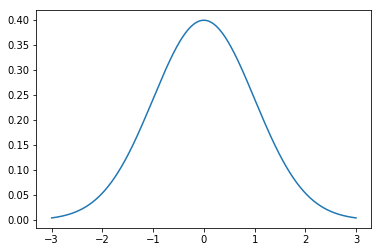

In [5]:
x = np.linspace(-3,3,1000)
plt.plot(x, stats.norm.pdf(x))

In [6]:
n_1 = 60
n_2 = 60
df = n_1 + n_2 -2
df

118

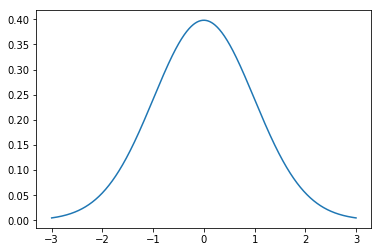

In [7]:
xs = np.linspace(-3,3,1000)
plt.plot(xs, stats.t.pdf(xs, df))

# Step 3: Specify the Decision Rule

In [11]:
stats.t.isf(0.025, df)

1.9802722492407063

# Step 4: Now Collect Data & Calculate Test Statistic

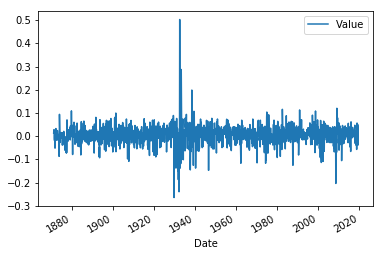

In [12]:
returns = prices.pct_change()
returns.plot()

In [13]:
ts_1 = returns.loc['2004-01-01':'2008-12-31']
ts_1.head()

,Value
Date,
2004-01-01,0.048009
2004-02-01,0.009572
2004-03-01,-0.016950
2004-04-01,0.008345
2004-05-01,-0.026982


In [14]:
ts_2 = returns.loc['2009-01-01':'2013-12-31']
ts_2.head()

,Value
Date,
2009-01-01,-0.013651
2009-02-01,-0.069722
2009-03-01,-0.059734
2009-04-01,0.120217
2009-05-01,0.063975


In [15]:
ts_1.count()

Value    60
dtype: int64

In [16]:
ts_2.count()

Value    60
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D1B3746D8>]],
      dtype=object)

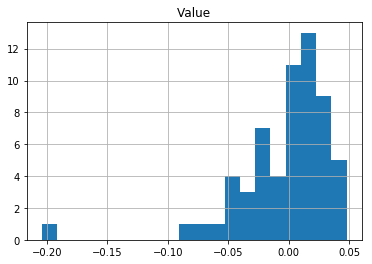

In [17]:
ts_1.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D1B39ADD8>]],
      dtype=object)

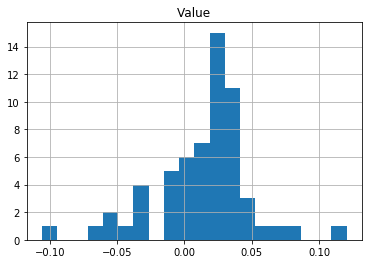

In [18]:
ts_2.hist(bins=20)

In [20]:
x_1 = ts_1.mean()
x_1

Value   -0.002629
dtype: float64

In [21]:
x_2 = ts_2.mean()
x_2

Value    0.012768
dtype: float64

In [23]:
s_1 = ts_1.var()
s_1

Value    0.001574
dtype: float64

In [24]:
s_2 = ts_2.var()
s_2

Value    0.001318
dtype: float64

In [25]:
s_p = ((n_1-1)*s_1 + (n_2-1)*s_2)/df
s_p

Value    0.001446
dtype: float64

In [27]:
((x_1-x_2)-0)/np.sqrt(((s_p/n_1)+(s_p/n_2)))

Value   -2.217816
dtype: float64

In [28]:
stats.ttest_ind(ts_1, ts_2, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=array([-2.21781574]), pvalue=array([0.02848209]))

# Step 5: Make Statistical Decision

# Step 6: Make Investment Decision